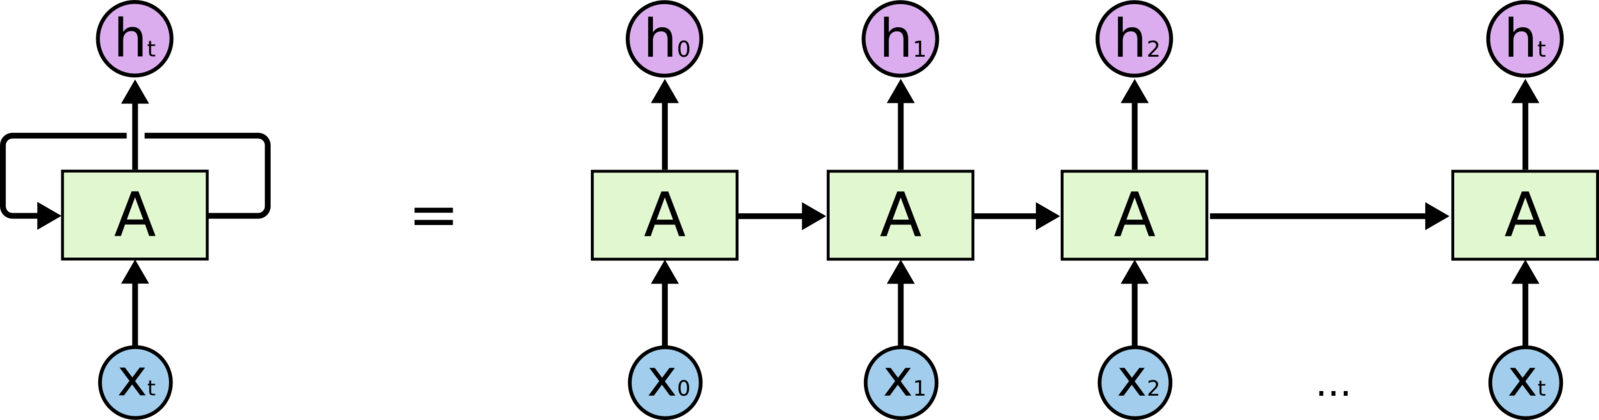

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
import tqdm

%config InlineBackend.figure_format='retina'

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Integration

## Dataset

In [ ]:
def get_coefficients(N):
    coeff = (np.random.randn(N) + 1j*np.random.randn(N)) / (1 + (2*np.pi*np.arange(N))**2)
    return coeff

def trig_matrix(x, N):
    return np.stack([np.exp(1j*x*2*np.pi*k) for k in range(N)], 1)

def int_trig_matrix(x, N):
    return np.stack([x if k == 0 else np.exp(1j*x*2*np.pi*k) / (1j*2*np.pi*k) for k in range(N)], 1)

def random_function(coeffs, M):
    return np.real(M @ coeffs)

def integration_dataset(N_samples, N_x, seed=33, N=150):
    np.random.seed(seed)
    x = np.linspace(0, 1, N_x)
    M = trig_matrix(x, N)
    int_M = int_trig_matrix(x, N)
    features = []
    targets = []
    for _ in range(N_samples):
        coeffs = get_coefficients(N)
        f = random_function(coeffs, M)
        int_f = random_function(coeffs, int_M)[-1]
        features.append(f)
        targets.append(int_f)
    # print(features)
    features = np.expand_dims(np.stack(features), 2)
    targets = np.expand_dims(np.stack(targets), 1)
    return features, targets

In [ ]:
x = np.linspace(0, 1, 4)

In [ ]:
N = 200
N_x = 100
np.random.seed(71)
coeffs = get_coefficients(N)
x = np.linspace(0, 1, N_x)
M = trig_matrix(x, N)
int_M = int_trig_matrix(x, N)

f = random_function(coeffs, M)
int_f = random_function(coeffs, int_M)

In [ ]:
f = random_function(coeffs, M)

In [ ]:
f.shape

(100,)

In [ ]:
np.expand_dims(np.stack(f), 2)

AxisError: axis 2 is out of bounds for array of dimension 2

In [ ]:
 np.expand_dims(np.array([3,4,5]), 1)

array([[3],
       [4],
       [5]])

In [ ]:
int_f.shape

(100,)

In [ ]:
f

array([-0.46173608, -0.46001515, -0.45776827, -0.454914  , -0.45254879,
       -0.45075153, -0.44847487, -0.44578697, -0.44240535, -0.43851829,
       -0.43421558, -0.43057757, -0.4269529 , -0.42299996, -0.41935972,
       -0.41524796, -0.41173088, -0.40808542, -0.4055878 , -0.4049834 ,
       -0.40466107, -0.40453512, -0.40485949, -0.40577417, -0.40661354,
       -0.4075993 , -0.40767062, -0.40716285, -0.4067348 , -0.40526542,
       -0.40393735, -0.40206749, -0.39996618, -0.3980269 , -0.39668681,
       -0.39601234, -0.39578777, -0.39599323, -0.39648973, -0.39734909,
       -0.39868   , -0.40061282, -0.40289808, -0.40411165, -0.40502086,
       -0.40510193, -0.40508943, -0.40484876, -0.40531314, -0.4052986 ,
       -0.40529051, -0.405807  , -0.40615141, -0.4062441 , -0.40706705,
       -0.40802395, -0.40961381, -0.41212566, -0.41411358, -0.41531489,
       -0.41542511, -0.41617016, -0.41832881, -0.41990896, -0.42159146,
       -0.42359945, -0.42613967, -0.42893288, -0.4316133 , -0.43

In [ ]:
int_f

array([-0.00455081, -0.00920719, -0.01384238, -0.0184518 , -0.02303446,
       -0.02759737, -0.03213915, -0.03665662, -0.04114254, -0.04559258,
       -0.05000038, -0.05436705, -0.05869788, -0.06298942, -0.06724462,
       -0.07145975, -0.07563644, -0.07977626, -0.0838845 , -0.08797699,
       -0.09206652, -0.09615273, -0.10024002, -0.10433392, -0.10843673,
       -0.11254886, -0.11666745, -0.12078235, -0.12489362, -0.12899491,
       -0.13308154, -0.13715278, -0.14120338, -0.14523317, -0.14924656,
       -0.15324897, -0.15724806, -0.16124669, -0.16524869, -0.16925788,
       -0.17327779, -0.17731369, -0.1813725 , -0.18544887, -0.18953585,
       -0.19362838, -0.1977204 , -0.20181045, -0.20590193, -0.20999632,
       -0.21408973, -0.21818561, -0.22228672, -0.22638965, -0.23049633,
       -0.23461213, -0.23874068, -0.24289034, -0.24706427, -0.25125421,
       -0.25544966, -0.25964862, -0.26386283, -0.26809695, -0.27234657,
       -0.27661486, -0.28090617, -0.28522464, -0.28957087, -0.29

In [ ]:
np.trapz(f, x=x), int_f[-1]

(-0.4306072256843328, -0.43515395960047054)

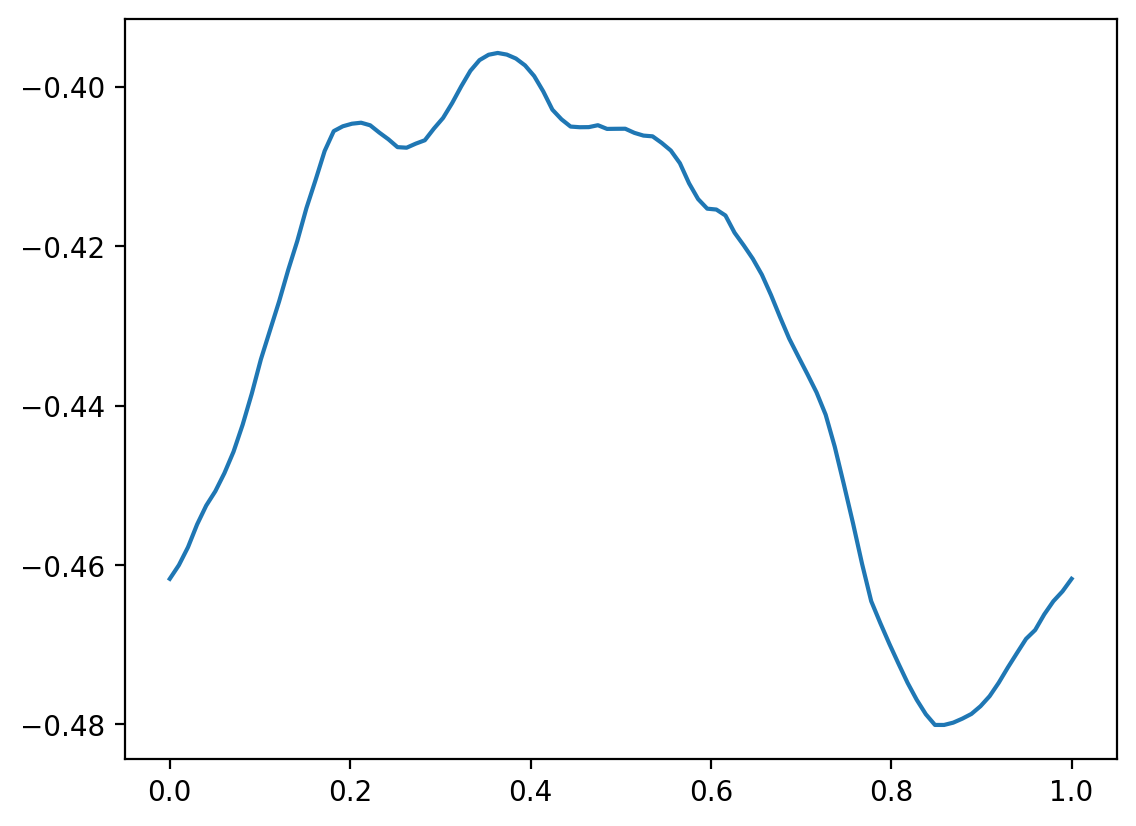

In [ ]:
plt.plot(x, f);

In [ ]:
N_x = 50
N_batch = 10
N_samples = 100 * N_batch
x = np.linspace(0, 1, N_x)
features, targets = integration_dataset(N_samples, 4)

In [ ]:
targets

In [ ]:
features.shape

(1000, 4, 1)

In [ ]:
N_x = 50
N_batch = 10
N_samples = 100 * N_batch
x = np.linspace(0, 1, N_x)
features, targets = integration_dataset(N_samples, N_x)
features, targets = features.reshape(N_samples // N_batch, N_batch, N_x, 1), targets.reshape(N_samples // N_batch, N_batch, 1)
X = np.stack([x]*N_samples, 0).reshape(N_samples // N_batch, N_batch, N_x, 1)
features = np.concatenate([features, X], 3)
features.shape, targets.shape

((100, 10, 50, 2), (100, 10, 1))

In [ ]:
features.shape


(1000, 4, 1)

In [ ]:
targets.shape

(1000, 1)

## Architecture and training


$$
h_t = \sigma(Wx_t + Uh_{t-1} +b)\\
y_t = Vh_t +b_v
$$

In [ ]:
class Vanilla_RNN(nn.Module):
    def __init__(self, embedding_dim, hidden_dim):
        super().__init__()

        self.W = nn.Linear(embedding_dim, hidden_dim)
        self.U = nn.Linear(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, seq, hidden_state):
        for i in range(seq.shape[1]):
            s = self.W(seq[:, i])
            hidden_state = self.U(hidden_state)
            hidden_state = torch.sigmoid(hidden_state + s)
        return self.fc(hidden_state), hidden_state

    def init_hidden(self, hidden_dim, batch_size):
        return torch.zeros((batch_size, hidden_dim))

In [ ]:
features.shape

(100, 10, 50, 2)

In [ ]:
for i in range(50):
  features[0][:, i]
  print(features)
  break


In [ ]:
def train(model, features, targets, optimizer, loss_function, hidden_dim, N_train):
    epoch_loss = 0
    epoch_acc = 0

    model.train()

    l = 0
    for i in range(N_train):
        optimizer.zero_grad()
        feature, target = features[i], targets[i]
        hidden_state = model.init_hidden(hidden_dim, feature.shape[0]).to(device)
        predictions, hidden_state = model(feature, hidden_state)
        loss = loss_function(predictions, target)
        loss.backward()
        optimizer.step()
        l += loss

    L = 0
    for i in range(N_train, features.shape[0]):
        feature, target = features[i], targets[i]
        hidden_state = model.init_hidden(hidden_dim, feature.shape[0]).to(device)
        predictions, hidden_state = model(feature, hidden_state)
        loss = loss_function(predictions, target)
        L += loss
    return l / N_train, L / (features.shape[0] - N_train)

In [ ]:
N_train = 70
N_epoch = 300
embedding_dim = 2
hidden_dim = 50
model = Vanilla_RNN(embedding_dim, hidden_dim)
model = model.to(device)

features = torch.Tensor(features).to(device)
targets = torch.Tensor(targets).to(device)

loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
Train_L = []
Test_L = []
for i in tqdm.tqdm(range(N_epoch)):
    train_loss, test_loss = train(model, features, targets, optimizer, loss_function, hidden_dim, 3)
    Train_L.append(train_loss.item())
    Test_L.append(test_loss.item())

Train_L = np.array(Train_L)
Test_L = np.array(Test_L)

100%|██████████| 300/300 [03:15<00:00,  1.53it/s]


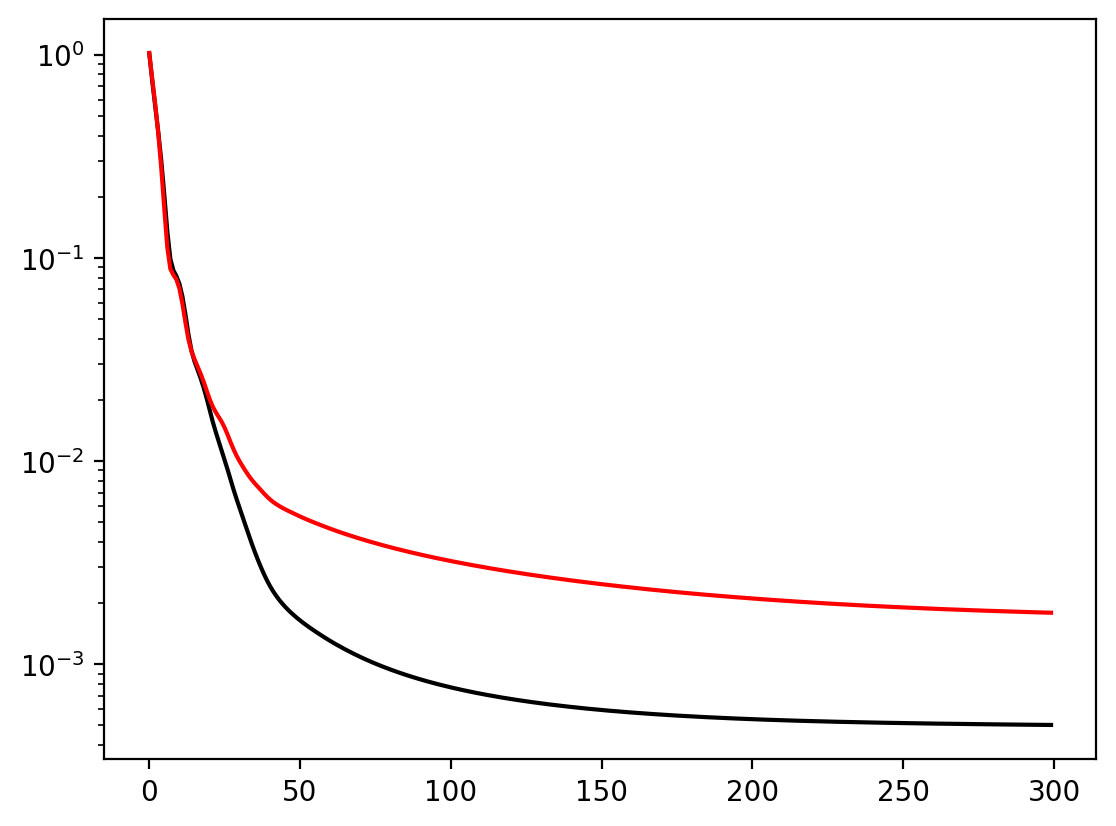

In [ ]:
plt.yscale("log")
plt.plot(Train_L, color="black")
plt.plot(Test_L, color="red");

In [ ]:
predictions = []
for i in range(features.shape[0]):
    feature = features[i]
    hidden_state = model.init_hidden(hidden_dim, feature.shape[0]).to(device)
    prediction, hidden_state = model(feature, hidden_state)
    predictions.append(prediction.detach().numpy())
predictions = np.array(predictions).reshape(-1,)
targets_np = targets.detach().numpy().reshape(-1,)

In [ ]:
np.mean(np.abs(predictions - targets_np))

0.02603373

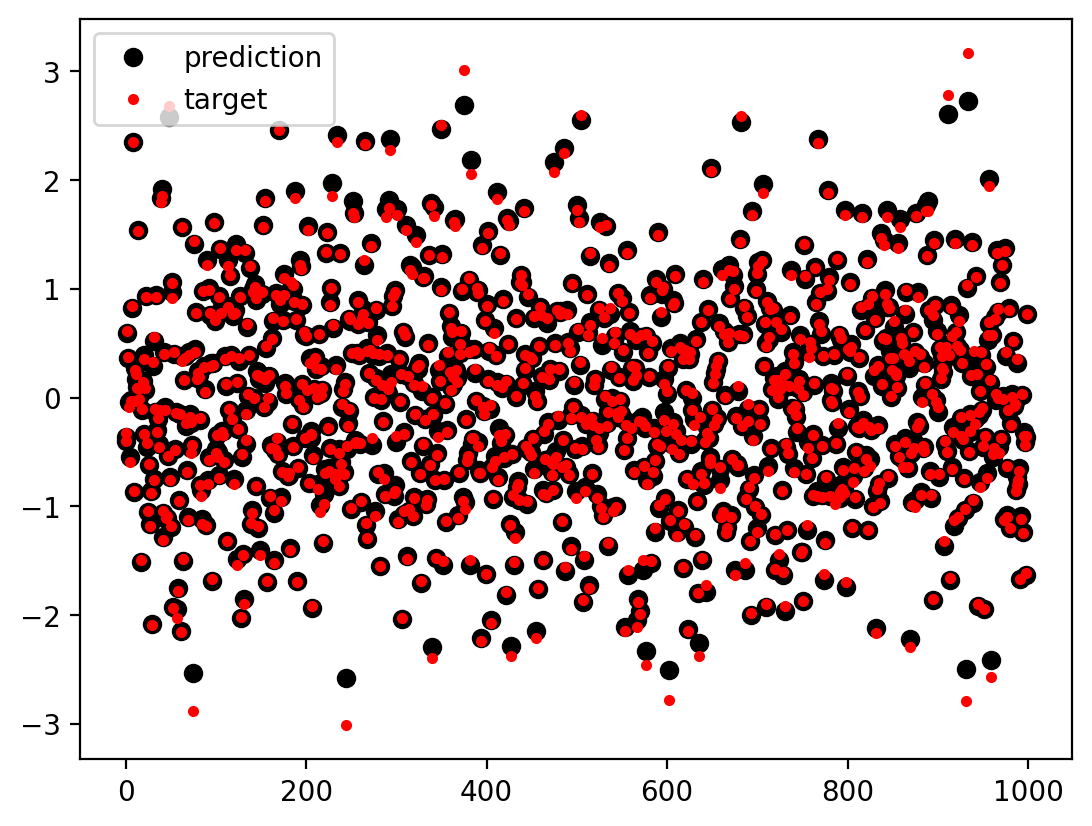

In [ ]:
plt.plot(predictions, "o", color="black", label="prediction")
plt.plot(targets_np, ".", color="red", label="target")
plt.legend();

# LSTM

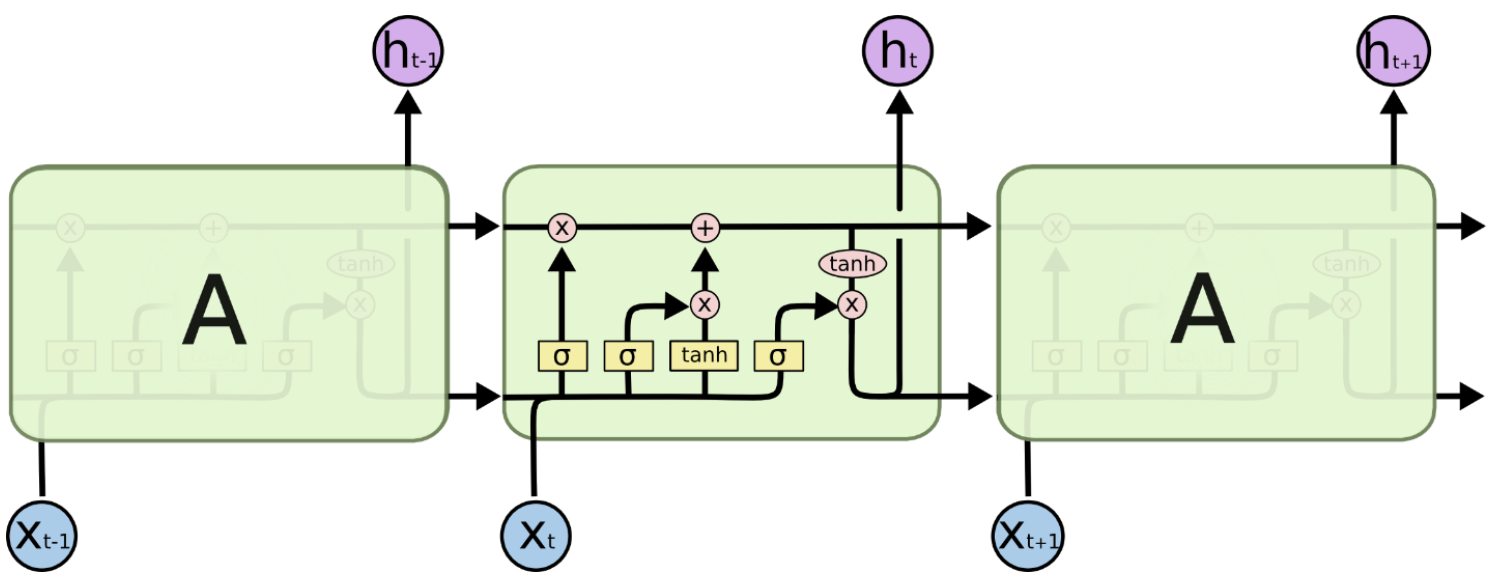

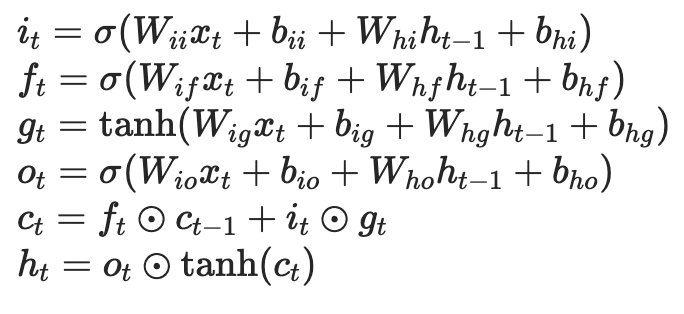

#GRU

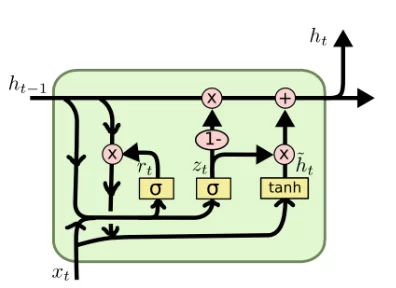

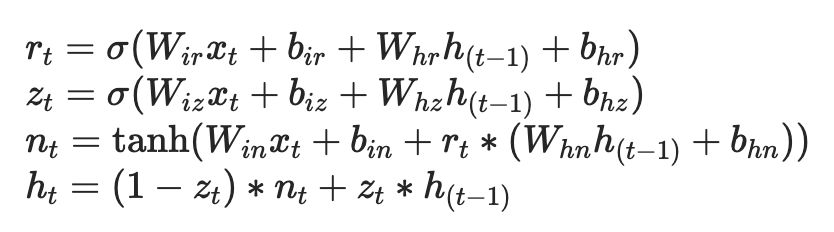